# Chapter 5
# Getting Started with Pandas (Part 1)

Pandas is a major tool of data scientists. It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy.

In [1]:
import pandas as pd

## 1. Download and extract MovieLens data

- [GroupLens Research](https://grouplens.org) is a human-computer interaction research lab at University of Minnesota, Twin Cities. 
- [MovieLens](https://grouplens.org/datasets/movielens/) is a web-based recommender system and virtual community that recommends movies for its users to watch, based on their file preferences using collaborative filtering of members' movie ratings and movie reviews. 

In [2]:
# Download ml-latest-small.zip from https://grouplens.org/datasets/movielens/
import urllib.request
url = "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
file_path = "Data/" # you need to create this folder first

import os
os.mkdir(file_path)

zip_file = "ml-latest-small.zip"
urllib.request.urlretrieve(url, file_path + zip_file)

('Data/ml-latest-small.zip', <http.client.HTTPMessage at 0x1a34a162e88>)

In [3]:
# Decompress the zip file
import zipfile
f = zipfile.ZipFile(file_path + zip_file, "r")
f.printdir()
f.extractall(file_path)
f.close()

File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431


In [4]:
# Since we only need the zip file in this step, 
# we can use the following strcuture:
with zipfile.ZipFile(file_path + zip_file, "r") as f:
    f.printdir()
    f.extractall(file_path)
# This cell does exactly the same thing as the above cell.

File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431


In [5]:
# Check that files has been unzipped
import os
print(os.listdir(file_path + "ml-latest-small"))

['links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


In [6]:
# Delete the zip file
os.remove(file_path + zip_file)
os.listdir(file_path)

['ml-latest-small']

In [7]:
# Write a function to download and decompress file
import os
import urllib.request
import zipfile

def get_movielens(file_path, file_name, delete_zip_file=False):
    url = "http://files.grouplens.org/datasets/movielens/" + file_name
    if not os.path.exists(file_path + file_name):
        urllib.request.urlretrieve(url, file_path + file_name)
        print("File", file_name, "downloaded.")
    with zipfile.ZipFile(file_path + file_name, "r") as f:
        f.extractall(file_path)
        print("Files extracted:")
        print(f.printdir())
    if delete_zip_file:
        os.remove(file_path + file_name)

In [8]:
file_path = "../../Data/"
zip_file = "ml-latest-small.zip"
get_movielens(file_path, zip_file)

File ml-latest-small.zip downloaded.
Files extracted:
File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431
None


In [9]:
os.listdir(file_path)

['babynames',
 'cereals',
 'diabetes',
 'houseprices',
 'ml-latest-small',
 'ml-latest-small.zip',
 'nyctaxi',
 'nyc_payroll']

In [10]:
# A larger dataset is ml-20m
# get_movielens(file_path, "ml-20m.zip")

## 2. Load ratings data as a pandas DataFrame
- Load csv file as a DataFrame
- head()
- shape, columns, dtypes
- indexing with loc[]
- Handle date and time data
- Data transformation with apply()

In [11]:
import pandas as pd
ratings_df = pd.read_csv("../../Data/ml-latest-small/ratings.csv",
                         delimiter=",")
ratings_df.head()  # Show the first several rows of the dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
ratings_df.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [13]:
print("Columns:", ", ".join(ratings_df.columns))

Columns: userId, movieId, rating, timestamp


In [14]:
print("Shape:", ratings_df.shape)

Shape: (100836, 4)


In [15]:
print("Data types:\n", ratings_df.dtypes)

Data types:
 userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [16]:
# Convert time stamp to a readable format

# Example: convert the first time stamp
timestamp = ratings_df.loc[0, "timestamp"]
print(timestamp)

from datetime import datetime
dt = datetime.fromtimestamp(timestamp)
print(dt)

ratings_df.loc[0, "Year"] = dt.year
ratings_df.loc[0, "Month"] = dt.month
ratings_df.loc[0, "Day"] = dt.day
ratings_df.loc[0, "Hour"] = dt.hour
ratings_df.loc[0, "Minute"] = dt.minute
ratings_df.loc[0, "Second"] = dt.second
ratings_df.head()

964982703
2000-07-30 14:45:03


,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second
0,1,1,4.0,964982703,2000.0,7.0,30.0,14.0,45.0,3.0
1,1,3,4.0,964981247,NaN,NaN,NaN,NaN,NaN,NaN
2,1,6,4.0,964982224,NaN,NaN,NaN,NaN,NaN,NaN
3,1,47,5.0,964983815,NaN,NaN,NaN,NaN,NaN,NaN
4,1,50,5.0,964982931,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# change the format of datetime
print(dt)
dt2 = dt.strftime('%Y - %b - %d')
print(dt2)

2000-07-30 14:45:03
2000 - Jul - 30


In [18]:
# Use apply() to apply a function to all rows
ratings_df["DT"] = ratings_df["timestamp"].apply(datetime.fromtimestamp)
ratings_df.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT
0,1,1,4.0,964982703,2000.0,7.0,30.0,14.0,45.0,3.0,2000-07-30 14:45:03
1,1,3,4.0,964981247,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:20:47
2,1,6,4.0,964982224,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:37:04
3,1,47,5.0,964983815,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-30 15:03:35
4,1,50,5.0,964982931,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:48:51


In [19]:
# Fill the year column
ratings_df['Year'] = ratings_df['DT'].dt.year
ratings_df['Month'] = ratings_df['DT'].dt.month
ratings_df['Day'] = ratings_df['DT'].dt.day

ratings_df.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT
0,1,1,4.0,964982703,2000,7,30,14.0,45.0,3.0,2000-07-30 14:45:03
1,1,3,4.0,964981247,2000,7,30,NaN,NaN,NaN,2000-07-30 14:20:47
2,1,6,4.0,964982224,2000,7,30,NaN,NaN,NaN,2000-07-30 14:37:04
3,1,47,5.0,964983815,2000,7,30,NaN,NaN,NaN,2000-07-30 15:03:35
4,1,50,5.0,964982931,2000,7,30,NaN,NaN,NaN,2000-07-30 14:48:51


In [20]:
# apply() can be used to apply user-defined functions

# Exercise: define a function that convert month to Q1 - Q4, and 
# use this function to create a "Quarter" column:

def convertMonToQuarter(month):
    if(month < 4):
        quarter = 1
    if (month>= 4 and month<7):
        quarter = 2
    if (month >= 7 and month < 9):
        quarter = 3
    if(month >= 9):
        quarter = 4
    return quarter    
convertMonToQuarter(8)

3

In [21]:
ratings_df["Quarter"] = ratings_df['Month'].apply(convertMonToQuarter)

In [22]:
ratings_df.tail()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT,Quarter
100831,610,166534,4.0,1493848402,2017,5,3,NaN,NaN,NaN,2017-05-03 17:53:22,2
100832,610,168248,5.0,1493850091,2017,5,3,NaN,NaN,NaN,2017-05-03 18:21:31,2
100833,610,168250,5.0,1494273047,2017,5,8,NaN,NaN,NaN,2017-05-08 15:50:47,2
100834,610,168252,5.0,1493846352,2017,5,3,NaN,NaN,NaN,2017-05-03 17:19:12,2
100835,610,170875,3.0,1493846415,2017,5,3,NaN,NaN,NaN,2017-05-03 17:20:15,2


In [23]:
df = pd.DataFrame({"Test1": [70, 80, 90],
                   "Test2": [75, 85, 95],
                   "Test3": [80, 90, 100]},
                  index=["Alice", "Bob", "Clare"])
df.head()

,Test1,Test2,Test3
Alice,70,75,80
Bob,80,85,90
Clare,90,95,100


In [24]:
import numpy as np
# Exercise: apply np.sqrt() to calculate the square root of test 1 scores
df['Test1sq'] = df['Test1'].apply(np.sqrt)
df.head()

# Exercise: apply np.mean() to create an "Average" column
df['Mean'] = df.apply(np.mean, axis=1)
df.head()

# Exercise: create a "Max" column that stores the maximum value from each row
df['Max'] = df.apply(np.max, axis=1)
df.head()

# Without axis=1, the function is applied to each column of the data frame.
print(df.apply(np.max))

Test1       90.000000
Test2       95.000000
Test3      100.000000
Test1sq      9.486833
Mean        73.621708
Max        100.000000
dtype: float64


In [25]:
import math
# math.sqrt(16)
df['sqrt from math'] = df['Test1'].apply(math.sqrt)
df.head()

,Test1,Test2,Test3,Test1sq,Mean,Max,sqrt from math
Alice,70,75,80,8.366600,58.341650,80.0,8.366600
Bob,80,85,90,8.944272,65.986068,90.0,8.944272
Clare,90,95,100,9.486833,73.621708,100.0,9.486833


# 3. Save the processed ratings data

Data can be saved in many different formats. Today we will study two commonly used formats: csv and feather.
- csv: High readability and stability
- feather: High read and write performance

In [26]:
# Save the processed data as a .csv file
csv_file = "../../Data/ml-latest-small/ratings_processed.csv"
ratings_df.to_csv(csv_file)

In [27]:
# Use Python package installer pip to install feather
!pip install --upgrade pip
!pip install feather-format

  Using cached https://files.pythonhosted.org/packages/00/b6/9cfa56b4081ad13874b0c6f96af8ce16cfbc1cb06bedf8e9164ce5551ec1/pip-19.3.1-py2.py3-none-any.whl
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pip\\_internal\\build_env.py'
Consider using the `--user` option or check the permissions.



  Created wheel for feather-format: filename=feather_format-0.4.0-cp37-none-any.whl size=3012 sha256=ac5bd30c87a93a63bb14d1fdce65cb8ebbd826fa0397eaec008909ee79d68d51
  Stored in directory: C:\Users\abdul\AppData\Local\pip\Cache\wheels\85\7d\12\2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built feather-format


In [28]:
import feather
# Save the processed data as a .feather file
feather_file = "../../Data/ml-latest-small/ratings_processed.feather"
# feather.write_dataframe(ratings_df, feather_file)
ratings_df.to_feather(feather_file)

In [29]:
# Load .feather file as DataFrame
# ratings_df2 = feather.read_dataframe(feather_file)
ratings_df2 = pd.read_feather(feather_file)
ratings_df2.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT,Quarter
0,1,1,4.0,964982703,2000,7,30,14.0,45.0,3.0,2000-07-30 14:45:03,3
1,1,3,4.0,964981247,2000,7,30,NaN,NaN,NaN,2000-07-30 14:20:47,3
2,1,6,4.0,964982224,2000,7,30,NaN,NaN,NaN,2000-07-30 14:37:04,3
3,1,47,5.0,964983815,2000,7,30,NaN,NaN,NaN,2000-07-30 15:03:35,3
4,1,50,5.0,964982931,2000,7,30,NaN,NaN,NaN,2000-07-30 14:48:51,3


In [30]:
import time
time.time()

1578636421.576871

In [31]:
# Time the writing speed
import time
start = time.time()
ratings_df.to_csv(csv_file)
end = time.time()
print("Writing to a csv file costs:", (end - start))
print("File size:", os.path.getsize(csv_file))

start = time.time()
ratings_df.to_feather(feather_file)
end = time.time()
print("Writing to a feather file costs:", (end - start))
print("File size:", os.path.getsize(feather_file))

Writing to a csv file costs: 2.4875807762145996
File size: 6601637
Writing to a feather file costs: 0.0181882381439209
File size: 9719192


In [32]:
# Exercise: Compare the loading time of csv and feather format

start = time.time()
ratings_df = pd.read_csv(csv_file,
                        delimiter=",")
end = time.time()
print(end-start)

start  = time.time()
ratings_df = pd.read_feather(feather_file)
end = time.time()
print(end - start)


0.24203705787658691
0.013608932495117188


## 4. pd.Series and pd.DataFrame

### Series

In [33]:
# Two important pandas data structure: Series (1D) and DataFrame (2D)
userId = ratings_df['userId']
# ?userId
# ?ratings_df

In [34]:
print(userId.values[:20])
print(userId.values[-20:])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[610 610 610 610 610 610 610 610 610 610 610 610 610 610 610 610 610 610
 610 610]


In [35]:
# Exercise: How many unique user IDs are there?
userId_set = set(userId)
print(len(userId_set))

610


In [36]:
# Index of userId
print(userId.index[:20])

RangeIndex(start=0, stop=20, step=1)


In [37]:
# Define a Series from scratch
series = pd.Series([4, 7, -5, 3],
                     index=['d', 'b', 'a', 'c'])
series

d    4
b    7
a   -5
c    3
dtype: int64

In [38]:
# slicing a Series
print("series['a']:")
print(series['a'])
print("\nseries[['a', 'b', 'c']]:")
print(series[['a', 'b', 'c']])
print("\nseries[series > 0]:")
print(series[series > 0])
# boolean values regarding index
print(series.index == 'a')
print(series[series.index == 'a'])

series['a']:
-5

series[['a', 'b', 'c']]:
a   -5
b    7
c    3
dtype: int64

series[series > 0]:
d    4
b    7
c    3
dtype: int64
[False False  True False]
a   -5
dtype: int64


In [39]:
# Arithmetic operations
print("series * 2:")
print(series * 2)

series * 2:
d     8
b    14
a   -10
c     6
dtype: int64


In [40]:
# Define a Series from a dictionary
dictionary = {'Ohio': 35000,
              'Texas': 71000,
              'Oregon': 16000,
              'Utah': 5000}
series2 = pd.Series(dictionary)
series2

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [41]:
# Add values
series2['New York'] = 12345
series2

Ohio        35000
Texas       71000
Oregon      16000
Utah         5000
New York    12345
dtype: int64

In [42]:
# Remove values
series2.drop('New York', inplace=True)
series2

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [43]:
# without inplace=True
series3 = series2.drop("Ohio")
series3

Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [44]:
series2

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

### DataFrame

In [45]:
import numpy as np
# Define a DataFrame from scratch
df1 = pd.DataFrame(np.random.rand(5, 3),
                   columns=['Feature1', 'Feature2', 'Feature3'])
df1.head()

,Feature1,Feature2,Feature3
0,0.669442,0.585754,0.432416
1,0.521077,0.914782,0.229798
2,0.548873,0.668541,0.667037
3,0.081191,0.837689,0.021560
4,0.613580,0.858656,0.652559


In [46]:
# Add values
df1.loc[1, 'Feature4'] = 1.234
df1

,Feature1,Feature2,Feature3,Feature4
0,0.669442,0.585754,0.432416,NaN
1,0.521077,0.914782,0.229798,1.234
2,0.548873,0.668541,0.667037,NaN
3,0.081191,0.837689,0.021560,NaN
4,0.613580,0.858656,0.652559,NaN


In [47]:
df1

,Feature1,Feature2,Feature3,Feature4
0,0.669442,0.585754,0.432416,NaN
1,0.521077,0.914782,0.229798,1.234
2,0.548873,0.668541,0.667037,NaN
3,0.081191,0.837689,0.021560,NaN
4,0.613580,0.858656,0.652559,NaN


In [48]:
df1.iloc[1, 2] # use the intrinsic index, not recommended.

0.22979817964205096

In [49]:
# Identify null values
df1.isnull()

,Feature1,Feature2,Feature3,Feature4
0,False,False,False,True
1,False,False,False,False
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [50]:
# df1[df1.isnull()] = 0
# df1

In [51]:
# Cound number of missing values for each column
np.sum(df1.isnull(), axis=0)

Feature1    0
Feature2    0
Feature3    0
Feature4    4
dtype: int64

In [52]:
# Remove rows
df1.drop([0, 1], axis=0, inplace=True)
df1

,Feature1,Feature2,Feature3,Feature4
2,0.548873,0.668541,0.667037,NaN
3,0.081191,0.837689,0.021560,NaN
4,0.613580,0.858656,0.652559,NaN


In [53]:
# Reset index
df1.reset_index(inplace=True) # set drop=True to remove original index
df1

,index,Feature1,Feature2,Feature3,Feature4
0,2,0.548873,0.668541,0.667037,NaN
1,3,0.081191,0.837689,0.021560,NaN
2,4,0.613580,0.858656,0.652559,NaN


In [54]:
# Remove columns
df1.drop(['Feature4'], axis=1, inplace=True)
df1

,index,Feature1,Feature2,Feature3
0,2,0.548873,0.668541,0.667037
1,3,0.081191,0.837689,0.021560
2,4,0.613580,0.858656,0.652559


In [55]:
df1.drop(['index'], axis=1, inplace=True)
df1

,Feature1,Feature2,Feature3
0,0.548873,0.668541,0.667037
1,0.081191,0.837689,0.021560
2,0.613580,0.858656,0.652559


In [56]:
# Exercise: Add one row to ratings_df and remove it.
ratings_df.loc[100836, ['userId', 'movieId', 'rating']] = [1.1, 2.2, 3.3]




In [57]:
ratings_df.tail()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT,Quarter
100832,610.0,168248.0,5.0,1.493850e+09,2017.0,5.0,3.0,NaN,NaN,NaN,2017-05-03 18:21:31,2.0
100833,610.0,168250.0,5.0,1.494273e+09,2017.0,5.0,8.0,NaN,NaN,NaN,2017-05-08 15:50:47,2.0
100834,610.0,168252.0,5.0,1.493846e+09,2017.0,5.0,3.0,NaN,NaN,NaN,2017-05-03 17:19:12,2.0
100835,610.0,170875.0,3.0,1.493846e+09,2017.0,5.0,3.0,NaN,NaN,NaN,2017-05-03 17:20:15,2.0
100836,1.1,2.2,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [58]:
ratings_df.drop([100836], axis=0, inplace=True)

In [59]:
ratings_df.tail()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT,Quarter
100831,610.0,166534.0,4.0,1.493848e+09,2017.0,5.0,3.0,NaN,NaN,NaN,2017-05-03 17:53:22,2.0
100832,610.0,168248.0,5.0,1.493850e+09,2017.0,5.0,3.0,NaN,NaN,NaN,2017-05-03 18:21:31,2.0
100833,610.0,168250.0,5.0,1.494273e+09,2017.0,5.0,8.0,NaN,NaN,NaN,2017-05-08 15:50:47,2.0
100834,610.0,168252.0,5.0,1.493846e+09,2017.0,5.0,3.0,NaN,NaN,NaN,2017-05-03 17:19:12,2.0
100835,610.0,170875.0,3.0,1.493846e+09,2017.0,5.0,3.0,NaN,NaN,NaN,2017-05-03 17:20:15,2.0


## 5. Analyzing MovieLens Data

#### A. How are the ratings distributed?

In [60]:
# Use value_counts() to find the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts()
print(rating_frequencies)

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


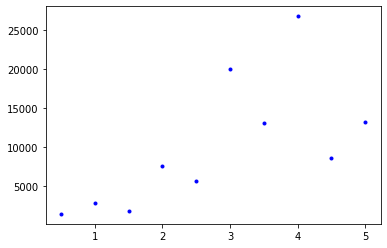

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rating_frequencies.index,
         rating_frequencies.values,
         'b.')

In [62]:
# Apply value_counts() to a data frame will give an error
# ratings_df.value_counts()

In [63]:
# What are the rating frequencies in 2018?

# Find the slice that correspond to 2018 ratings
index_2018 = (ratings_df['Year'] == 2018)
# print(index_2018)

# Extract all 2018 ratings
ratings_2018 = ratings_df[index_2018]
ratings_2018.head()
print("Shape of the sub data frame:", ratings_2018.shape)
print(ratings_2018['Year'].value_counts())

Shape of the sub data frame: (6413, 12)
2018.0    6413
Name: Year, dtype: int64


In [64]:
# find rating frequencies of the subset
rating_freq_2018 = ratings_2018['rating'].value_counts()
print(rating_freq_2018)

4.0    1345
3.5     971
3.0     857
4.5     770
5.0     763
2.5     556
2.0     521
1.5     268
0.5     182
1.0     180
Name: rating, dtype: int64


Text(0, 0.5, 'Relative Frequency')

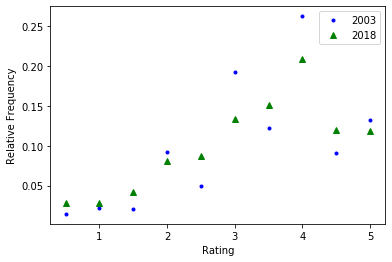

In [65]:
# What are the rating frequencies in 2003?
rating_freq_2003 = ratings_df[ratings_df['Year'] == 2003]['rating'].value_counts()
plt.plot(rating_freq_2003 / np.sum(rating_freq_2003), 'b.', label="2003")
plt.plot(rating_freq_2018 / np.sum(rating_freq_2018), 'g^', label="2018")
plt.legend()
plt.xlabel("Rating")
plt.ylabel("Relative Frequency")

#### B. How consistant are the average ratings over time?

In [66]:
# How consistent are the average ratings over time?



#### C. How fast does the movie library grow?

3.3891314517386557


(0, 5)

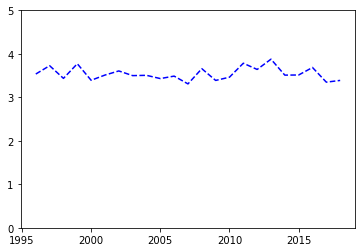

In [67]:
# How many movies were rated in 2003? in 2018?

# Example: average rating of 2018
index_2018 = (ratings_df['Year'] == 2018)
ratings_2018 = ratings_df[index_2018]
avg_rating = np.mean(ratings_2018['rating'])
print(avg_rating)

# Get the set of all years in the dataset
# set(ratings_df['Year'])
years = np.sort(ratings_df['Year'].unique())
all_avg_ratings = []
for year in years:
    index_year = (ratings_df['Year'] == year)
    ratings_year = ratings_df[index_year]
    avg_rating = np.mean(ratings_year['rating'])
    all_avg_ratings.append(avg_rating)
plt.plot(years, all_avg_ratings, 'b--')
plt.ylim([0, 5])

In [68]:
# Do number of movies increase over time?



#### D. How fast does the user base grow?

In [69]:
# How many ratings were submitted per year?



In [70]:
# How many users gave ratings per year?



#### E. Popular Movies

In [71]:
# Which movie received the highest number of ratings?



In [72]:
# Which movie received the highest number of 5.0?



In [73]:
# Which five movies have the highest average rating?



#### F. Time of ratings

In [74]:
ratings_df.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT,Quarter
0,1.0,1.0,4.0,964982703.0,2000.0,7.0,30.0,14.0,45.0,3.0,2000-07-30 14:45:03,3.0
1,1.0,3.0,4.0,964981247.0,2000.0,7.0,30.0,NaN,NaN,NaN,2000-07-30 14:20:47,3.0
2,1.0,6.0,4.0,964982224.0,2000.0,7.0,30.0,NaN,NaN,NaN,2000-07-30 14:37:04,3.0
3,1.0,47.0,5.0,964983815.0,2000.0,7.0,30.0,NaN,NaN,NaN,2000-07-30 15:03:35,3.0
4,1.0,50.0,5.0,964982931.0,2000.0,7.0,30.0,NaN,NaN,NaN,2000-07-30 14:48:51,3.0


In [75]:
# When was the first rating given?

ratings_df['DT'].min()

Timestamp('1996-03-29 14:36:55')

In [76]:
# When was the last rating given?
ratings_df['DT'].max()


Timestamp('2018-09-24 10:27:30')

In [77]:
# During what time of day do most users give ratings?



## Week 4 Homework: 

Create a new Jupyter notebook and load ratings.csv as a pandas data frame.

For movie (ID 260: Star Wars: A New Hope) and (ID 9645: Star Wars: The Last Jedi), find:

1. how many ratings were given to this movie
2. What is the highest and lowest rating
3. When was the first rating given?
4. When was the last rating given?
5. What is the average rating?
6. Plot the frequency distribution of the ratings